#Adam Kritz Image Classification Project

Welcome to my third project for data mining, the image classification project. Today I will be using the second data set we were given to classify images into six categories: Buildings, Forest, Glacier, Mountain, Sea, and Street. I chose this dataset because it is smaller, and I think since it has an similar format to the cats and dogs pictures, it should be easier to code. This project will also likely be far shorter overall than my other two projects, as I have less material to implement from the labs. 

Now I do not mean to brag, but I can already classify these images myself quite easily with nearly 100% accuracy. I do not believe any classifier on Earth could do better than me on accuracy, so I take comfort in the fact that we have not yet reached the machine revolution. 

Contents:
1. Get that data in
2. Basic Model
3. Model Experimentation Part 1
4. Model Experimentation Part 2
5. Error Analysis
6. One more model
7. Conclusion

#Read the files

I will start by bringing in the datasets. The following commands will only work properly if you upload the files as well under the same name and in the same location.

In [1]:
!ls

labels.csv  sample_data  seg_test.zip  seg_train.zip


Unzip the files. 

In [2]:
!unzip seg_test.zip

Archive:  seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg  
  inflating: seg_tes

In [3]:
!unzip seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7539.jpg  
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inf

It seems like the makers of this kaggle dataset were very kind, as the data is already separated into categories. Now we just need to get the pictures into the right format.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'seg_train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'seg_test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Looking good!

It is important to note that while usually I would explore the data here, there is not really anything to explore this time, as the directions give all the necessary information. I should also not that I will not be using validation data, as I kept having issues with getting it to work, and I was able to get good accuracy anyway. 

#Basic Model

I will start with a very basic model to see how the classifier does with nothing else.

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 34,563,590
Trainable params: 34,563,590
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['acc'])

In [7]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=10)

Epoch 1/10
100/100 [==============================] - 6s 26ms/step - loss: 11.4580 - acc: 0.2362
Epoch 2/10
100/100 [==============================] - 3s 26ms/step - loss: 3.8250 - acc: 0.3149
Epoch 3/10
100/100 [==============================] - 3s 26ms/step - loss: 3.9231 - acc: 0.3375
Epoch 4/10
100/100 [==============================] - 3s 26ms/step - loss: 3.4460 - acc: 0.3482
Epoch 5/10
100/100 [==============================] - 3s 26ms/step - loss: 3.2469 - acc: 0.3914
Epoch 6/10
100/100 [==============================] - 3s 26ms/step - loss: 3.2105 - acc: 0.3923
Epoch 7/10
100/100 [==============================] - 3s 26ms/step - loss: 3.2985 - acc: 0.3754
Epoch 8/10
100/100 [==============================] - 3s 25ms/step - loss: 3.1265 - acc: 0.3949
Epoch 9/10
100/100 [==============================] - 3s 25ms/step - loss: 3.3958 - acc: 0.3770
Epoch 10/10
100/100 [==============================] - 3s 25ms/step - loss: 3.3401 - acc: 0.3885


In [9]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 21ms/step - loss: 3.5359 - acc: 0.3830
Accuracy:  0.382999986410141


Yikes, this classifier is not going to win any competitions. The accuracy is close to 38%, and the loss is a whopping 3.5. Let me graph the results to see what went wrong. 

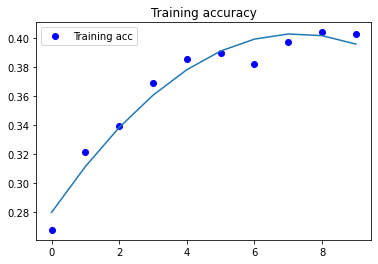

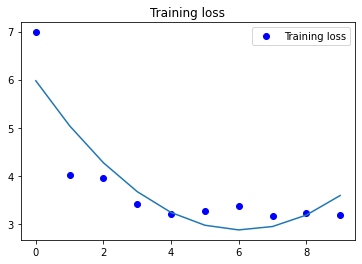

In [10]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.plot(np.unique(epochs), np.poly1d(np.polyfit(epochs, acc, 2))(np.unique(epochs)))
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.plot(np.unique(epochs), np.poly1d(np.polyfit(epochs, loss, 2))(np.unique(epochs)))
plt.legend()

plt.show()

I included a line of best fit to help visualize the data. As one can easily see, the accuracy seems to stop in the mid 40%, and the loss does not go below three. In this case, more epochs looks like it could really only get the data to maybe 50% at most, so instead I will build a new model. 

#Model Experimentation Part 1

Well the first model left a lot to be desired. Let me see if I can add some more layers to increase accuracy.

In [11]:
network = models.Sequential()

network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [12]:
network.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['acc'])

In [14]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=10)

Epoch 1/10
100/100 [==============================] - 3s 28ms/step - loss: 1.3209 - acc: 0.4885
Epoch 2/10
100/100 [==============================] - 3s 28ms/step - loss: 1.0574 - acc: 0.5800
Epoch 3/10
100/100 [==============================] - 3s 27ms/step - loss: 1.0051 - acc: 0.6200
Epoch 4/10
100/100 [==============================] - 3s 28ms/step - loss: 0.9228 - acc: 0.6630
Epoch 5/10
100/100 [==============================] - 3s 27ms/step - loss: 0.8748 - acc: 0.6765
Epoch 6/10
100/100 [==============================] - 3s 27ms/step - loss: 0.8608 - acc: 0.6765
Epoch 7/10
100/100 [==============================] - 3s 27ms/step - loss: 0.8026 - acc: 0.7000
Epoch 8/10
100/100 [==============================] - 3s 27ms/step - loss: 0.7956 - acc: 0.7055
Epoch 9/10
100/100 [==============================] - 3s 27ms/step - loss: 0.7778 - acc: 0.7180
Epoch 10/10
100/100 [==============================] - 3s 31ms/step - loss: 0.7572 - acc: 0.7212


In [15]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 22ms/step - loss: 0.6925 - acc: 0.7517
Accuracy:  0.7516666650772095


Much better now, that accuracy is over 75%.

In [16]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [17]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=20)

Epoch 1/20
100/100 [==============================] - 3s 28ms/step - loss: 2.4865 - accuracy: 0.3428
Epoch 2/20
100/100 [==============================] - 3s 27ms/step - loss: 1.1843 - accuracy: 0.5394
Epoch 3/20
100/100 [==============================] - 3s 28ms/step - loss: 0.9851 - accuracy: 0.6020
Epoch 4/20
100/100 [==============================] - 3s 28ms/step - loss: 0.8544 - accuracy: 0.6755
Epoch 5/20
100/100 [==============================] - 3s 28ms/step - loss: 0.7645 - accuracy: 0.7251
Epoch 6/20
100/100 [==============================] - 3s 28ms/step - loss: 0.7307 - accuracy: 0.7342
Epoch 7/20
100/100 [==============================] - 3s 28ms/step - loss: 0.6515 - accuracy: 0.7566
Epoch 8/20
100/100 [==============================] - 3s 28ms/step - loss: 0.6319 - accuracy: 0.7963
Epoch 9/20
100/100 [==============================] - 3s 28ms/step - loss: 0.6296 - accuracy: 0.7693
Epoch 10/20
100/100 [==============================] - 3s 28ms/step - loss: 0.5538 - accura

In [19]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 22ms/step - loss: 0.6603 - accuracy: 0.7950
Accuracy:  0.7950000166893005


The classifier seems to cap out around 80% right now, which is pretty good. Let me look at a few individual images now to check the results.  


#Model Experimentation Part 2

Let me see how my classifier does on some random pictures from the dataset, and pictures from the internet.

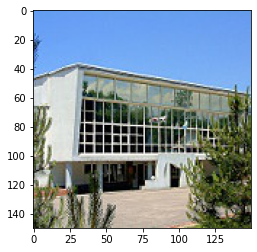

In [20]:
img_path = 'seg_test/buildings/20078.jpg'
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [21]:
x = network.predict(img_tensor)
print('Building:', x[0][0], '\nForest:', x[0][1], '\nGlacier:', x[0][2], '\nMountain:', x[0][3], '\nSea:', x[0][4], '\nStreet:', x[0][5])

Building: 0.99984217 
Forest: 0.017032394 
Glacier: 0.95243376 
Mountain: 0.9452939 
Sea: 0.99811447 
Street: 0.9009279


The building prediction here looks pretty good, but it seems to think it is a lot of other things as well.

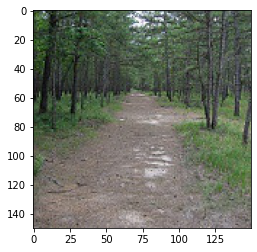

In [22]:
img_path = 'seg_test/forest/20056.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [23]:
x = network.predict(img_tensor)
print('Building:', x[0][0], '\nForest:', x[0][1], '\nGlacier:', x[0][2], '\nMountain:', x[0][3], '\nSea:', x[0][4], '\nStreet:', x[0][5])

Building: 0.09764893 
Forest: 0.993576 
Glacier: 0.54412764 
Mountain: 0.018548062 
Sea: 0.27671123 
Street: 0.8575903


My model crushed it on the forest picture, only slightly thinking it is a street. 

Well my model seems to be doing very well for itself. I am going to add two more layers and run it for 50 epochs as a reward. I will also increase the steps per epoch.

In [24]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [25]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
history = network.fit(
          train_generator,
          steps_per_epoch=200,
          epochs=50)

Epoch 1/50
200/200 [==============================] - 6s 27ms/step - loss: 1.5624 - accuracy: 0.3663
Epoch 2/50
200/200 [==============================] - 5s 27ms/step - loss: 1.0015 - accuracy: 0.6128
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 0.8589 - accuracy: 0.6772
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 0.7691 - accuracy: 0.7179
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.7235 - accuracy: 0.7466
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 0.6881 - accuracy: 0.7450
Epoch 7/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5972 - accuracy: 0.7789
Epoch 8/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5225 - accuracy: 0.8055
Epoch 9/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5595 - accuracy: 0.8112
Epoch 10/50
200/200 [==============================] - 5s 27ms/step - loss: 0.5425 - accura

In [27]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 22ms/step - loss: 1.1849 - accuracy: 0.7140
Accuracy:  0.7139999866485596


Clearly I celebrated too early, as my model is really struggling to get much higher. It may be overfitting here. Let me try adding a dropout layer. 

In [28]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

In [29]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [30]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30)

Epoch 1/30
100/100 [==============================] - 3s 27ms/step - loss: 1.7420 - accuracy: 0.2927
Epoch 2/30
100/100 [==============================] - 3s 27ms/step - loss: 1.2362 - accuracy: 0.5208
Epoch 3/30
100/100 [==============================] - 3s 27ms/step - loss: 1.0619 - accuracy: 0.5832
Epoch 4/30
100/100 [==============================] - 3s 27ms/step - loss: 1.0027 - accuracy: 0.6162
Epoch 5/30
100/100 [==============================] - 3s 27ms/step - loss: 0.9523 - accuracy: 0.6318
Epoch 6/30
100/100 [==============================] - 3s 27ms/step - loss: 0.9217 - accuracy: 0.6636
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.8664 - accuracy: 0.6731
Epoch 8/30
100/100 [==============================] - 3s 27ms/step - loss: 0.7928 - accuracy: 0.7036
Epoch 9/30
100/100 [==============================] - 3s 27ms/step - loss: 0.7868 - accuracy: 0.7077
Epoch 10/30
100/100 [==============================] - 3s 27ms/step - loss: 0.7301 - accura

In [31]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 22ms/step - loss: 0.6055 - accuracy: 0.7877
Accuracy:  0.7876666784286499


In this case the model only got a bit better with the dropout layer, so it does not seem to be overfitting too much. Let me try to find another way to increase accuracy.

#Error Analysis

When I scrolled through the discussions for this project on Kaggle, I came across one that was easy to understand and had some good pointers from Vincent Liu. Here is a link to it: https://www.kaggle.com/vincee/intel-image-classification-cnn-keras 

Vincent did error analysis on his classifier to see what it messed up most, and I will attempt to do the same. 

In [32]:
x = network.predict(test_generator)
x

array([[4.5709887e-01, 7.4761569e-01, 2.4404240e-01, 1.6205083e-01,
        6.3432187e-02, 8.6351806e-01],
       [2.1993881e-02, 9.9354398e-01, 6.4501986e-03, 4.9730996e-04,
        1.6762270e-04, 1.9848863e-02],
       [5.0352469e-02, 1.7235048e-02, 2.8298160e-01, 4.4548538e-01,
        3.1694400e-01, 7.5334650e-01],
       ...,
       [1.5620671e-01, 3.8809716e-04, 9.4960183e-01, 9.6477824e-01,
        3.5772420e-02, 2.7547752e-02],
       [7.6570642e-01, 7.8932774e-01, 1.3600224e-01, 2.2517104e-02,
        6.0981750e-03, 9.6033138e-01],
       [7.0727772e-01, 8.4609312e-01, 3.9667106e-04, 3.0811425e-05,
        3.9745028e-06, 9.9996829e-01]], dtype=float32)

In [33]:
len(x)

3000

Here I created a data frame with all my labels in it. **I included this in my github project folder in case you want to use it.**

In [34]:
import pandas as pd
labels = pd.read_csv('labels.csv')
labels

,buildings,forest,glacier,mountain,sea,street
0,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...
1,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...
2,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...
3,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...
4,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...,C:\Users\trash\Desktop\data for the zarch\seg_...
...,...,...,...,...,...,...
548,NaN,NaN,C:\Users\trash\Desktop\data for the zarch\seg_...,NaN,NaN,NaN
549,NaN,NaN,C:\Users\trash\Desktop\data for the zarch\seg_...,NaN,NaN,NaN
550,NaN,NaN,C:\Users\trash\Desktop\data for the zarch\seg_...,NaN,NaN,NaN
551,NaN,NaN,C:\Users\trash\Desktop\data for the zarch\seg_...,NaN,NaN,NaN


In [35]:
print(labels['buildings'][0][61:66])

24322


In [36]:
len = 437
count = 0
buildings_pred = []
while count < len:
  y = labels['buildings'][count][61:66]
  img_path = 'seg_test/buildings/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

In [37]:
buildings_pred

[5,
 0,
 5,
 0,
 0,
 3,
 3,
 5,
 5,
 5,
 0,
 5,
 0,
 0,
 5,
 0,
 5,
 0,
 5,
 0,
 0,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 0,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 0,
 5,
 0,
 5,
 0,
 0,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 4,
 0,
 0,
 1,
 5,
 5,
 0,
 0,
 0,
 0,
 4,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 3,
 4,
 0,
 0,
 5,
 0,
 0,
 5,
 5,
 0,
 5,
 5,
 0,
 1,
 3,
 1,
 0,
 2,
 5,
 5,
 5,
 2,
 5,
 0,
 5,
 5,
 5,
 0,
 0,
 4,
 0,
 5,
 3,
 0,
 0,
 5,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 3,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 1,
 0,
 2,
 5,
 0,
 0,
 0,
 5,
 0,
 5,
 0,
 5,
 1,
 0,
 0,
 4,
 4,
 0,
 5,
 0,
 0,
 2,
 0,
 0,
 4,
 5,
 0,
 0,
 3,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 2,
 5,
 5,
 0,
 5,
 5,
 4,
 0,
 0,
 2,
 0,
 5,
 0,
 0,
 0,
 5,
 0,
 5,
 0,
 3,
 5,
 0,
 0,
 4,
 2,
 5,
 0,
 5,
 5,
 0,
 2,
 0,
 5,
 0,
 5,
 4,
 5,
 5,
 5,
 0,
 2,
 2,
 3,
 5,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 5,
 0,
 5,
 0,
 1,
 5,
 5,
 1,
 5,
 0,
 5,
 0,
 0,
 0,


In [38]:
buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

0    191
5    167
4     25
3     23
2     17
1     14
dtype: int64


Buildings were all over the place. They are very often classified as streets.

In [39]:
len = 474
count = 0
buildings_pred = []
while count < len:
  y = labels['forest'][count][58:63]
  img_path = 'seg_test/forest/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

1    459
5      8
3      4
4      2
0      1
dtype: int64


Forests were nearly perfect, only sometimes being classified as streets.

In [40]:
len = 553
count = 0
buildings_pred = []
while count < len:
  y = labels['glacier'][count][59:64]
  img_path = 'seg_test/glacier/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

2    442
3     70
4     20
5     16
1      5
dtype: int64


Glaciers were bad, often being classified as mountains and seas.

In [41]:
len = 525
count = 0
buildings_pred = []
while count < len:
  y = labels['mountain'][count][60:65]
  img_path = 'seg_test/mountain/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

3    410
2     63
4     38
5      9
1      4
0      1
dtype: int64


Mountains were also classified as glaciers and seas, but did better than glaciers.

In [43]:
len = 510
count = 0
buildings_pred = []
while count < len:
  y = labels['sea'][count][55:60]
  img_path = 'seg_test/sea/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

4    384
2     54
3     38
5     24
1      6
0      4
dtype: int64


Seas were most often accidentally classified as mountains and glaciers. I sense a pattern among these three.

In [45]:
len = 501
count = 0
buildings_pred = []
while count < len:
  y = labels['street'][count][58:63]
  img_path = 'seg_test/street/' + y + '.jpg'
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  z = network.predict(img_tensor)
  p = z[0].argmax(axis=0)
  buildings_pred.append(p)
  count = count+1

buildings_pred2 = pd.Series(buildings_pred) 
k = buildings_pred2.value_counts()
print(k)

5    477
4      6
1      6
0      5
3      4
2      3
dtype: int64


And finally, streets were most often mistaken as buildings and forests.

So what have I learned? This classifier most often confuses buildings, forests, and streets. It also confuses glaciers, mountains, and seas. Overall, it is very good at classifying forests and streets, and pretty awful at classifying buildings. It is mediocre on glaciers mountains and seas.

#One more model

The final model I use will be another model I have taken and reworkd from Vincent and a few other things I wanted to try. Let me see how it performs. 

In [46]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1000, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(6, activation='sigmoid'))
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [48]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [49]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=100)

Epoch 1/100
100/100 [==============================] - 3s 27ms/step - loss: 1.6070 - accuracy: 0.2985
Epoch 2/100
100/100 [==============================] - 3s 27ms/step - loss: 1.1764 - accuracy: 0.5101
Epoch 3/100
100/100 [==============================] - 3s 27ms/step - loss: 1.0196 - accuracy: 0.6099
Epoch 4/100
100/100 [==============================] - 3s 27ms/step - loss: 1.0049 - accuracy: 0.5937
Epoch 5/100
100/100 [==============================] - 3s 27ms/step - loss: 0.9277 - accuracy: 0.6092
Epoch 6/100
100/100 [==============================] - 3s 27ms/step - loss: 0.9069 - accuracy: 0.6203
Epoch 7/100
100/100 [==============================] - 3s 27ms/step - loss: 0.9425 - accuracy: 0.6264
Epoch 8/100
100/100 [==============================] - 3s 27ms/step - loss: 0.8703 - accuracy: 0.6629
Epoch 9/100
100/100 [==============================] - 3s 27ms/step - loss: 0.8356 - accuracy: 0.6810
Epoch 10/100
100/100 [==============================] - 3s 27ms/step - loss: 0.827

In [50]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

150/150 [==============================] - 3s 22ms/step - loss: 0.6116 - accuracy: 0.8423
Accuracy:  0.8423333168029785


#Conclusion

CNNs are very difficult to use. I feel like I could take a whole course on these things and still not fully understand it. I hope I can learn more about them in the future, and I am happy I was able to get an accuracy over 84%.